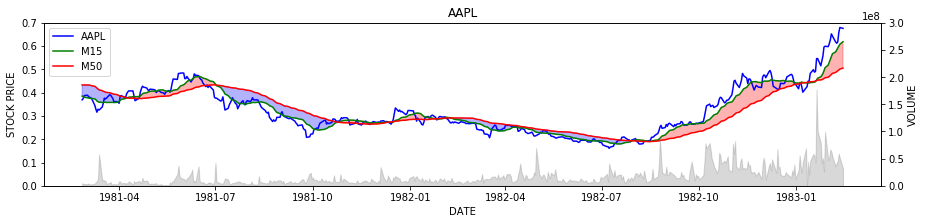

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

n = 500

AAPL = pd.read_csv('dow30/AAPL.csv').set_index('Date')
AAPL.index = pd.to_datetime(AAPL.index)
AAPL = AAPL.fillna(method='ffill')
AAPL['M15'] = AAPL['Adj Close'].rolling(15).mean() 
AAPL['M50'] = AAPL['Adj Close'].rolling(50).mean() 
# print(AAPL.loc[pd.to_datetime(['1981-08-07'])])
# print(AAPL.loc[pd.to_datetime(['1981-08-10'])])
# print(AAPL.loc[pd.to_datetime(['1981-08-11'])])

DATE = AAPL.index[50:50+n]
y = AAPL['Adj Close'].loc[DATE]
y_15 = AAPL['M15'].loc[DATE]
y_50 = AAPL['M50'].loc[DATE]
y_vol = AAPL['Volume'].loc[DATE] 

fig, ax = plt.subplots(figsize=(15, 3))

ax.plot(DATE, y, label='AAPL', color='b')
ax.plot(DATE, y_15, label='M15', color='g')
ax.plot(DATE, y_50, label='M50', color='r')
ax.set_ylim([0.0, 0.7])

ax.fill_between(DATE, y_15, y_50, where=(y_15 > y_50), interpolate=True, color='r', alpha=0.3)
ax.fill_between(DATE, y_15, y_50, where=(y_15 <= y_50), interpolate=True, color='b', alpha=0.3)

ax.set_xlabel('DATE')
ax.set_ylabel('STOCK PRICE')
ax.set_title('AAPL')

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
ax2.fill_between(DATE, y_vol, color='gray', alpha=0.3)
ax2.set_ylim([0.0, 3e8])

ax2.set_ylabel('VOLUME')

ax.legend()
plt.show()